# Class Notebooks

* [HAPI_00.ipynb](HAPI_00.ipynb) - Introduction
* **[HAPI_01.ipynb](HAPI_01.ipynb) - Basics (this Notebook)**
* [HAPI_02.ipynb](HAPI_02.ipynb) - Data structures

# Setup

We'll be using data from the October 28, 2021 flare + CME event that started at 15:35 UTC.

First, we will import the HAPI libraries.  We'll repeat these calls in each example so that you can try them in any order during this demo. The basic import lines can be used in any Python code. We repeat these two lines in most code blocks even though it is not necessary. The we do this so content in a code block can be copied and pasted into and editor and run without having to find additional import statements in the Notebook.

In [ ]:
from hapiclient import hapi
from hapiplot import hapiplot

The following are optional Jupyter Notebook-specific configuration options

In [2]:
# Have Matplotlib create vector (svg) instead of raster (png) images
%config InlineBackend.figure_formats = ['svg']

# Display documentation

The function [`hapi`](https://github.com/hapi-server/client-python/blob/master/hapiclient/hapi.py#L144) is the primary function that you will use. Note that it does not follow common Python conventions for function calls because the number of non-keyword arguments is not fixed and the number of outputs varies depending on the input arguments.

In [3]:
from hapiclient import hapi
help(hapi)

Help on function hapi in module hapiclient.hapi:

hapi(*args, **kwargs)
    Request data from a HAPI server.
    
    Version: 0.2.5
    
    
    Examples
    ----------
    `Jupyter Notebook <https://colab.research.google.com/drive/11Zy99koiE90JKJ4u_KPTaEBMQFzbfU3P?usp=sharing>`_
    
    Parameters
    ----------
    server: str
        A string with the URL to a HAPI compliant server. (A HAPI URL         always ends with ``/hapi``).
    dataset: str
        A string specifying a dataset from a `server`
    parameters: str
        A comma-separated list of parameters in `dataset`
    start: str
        The start time of the requested data
    stop: str
        The end time of the requested data; end times are exclusive - the
        last data record returned by a HAPI server should have a timestamp
        before `start`.
    options: dict
            `logging` (``False``) - Log to console
    
            `cache` (``True``) - Save responses and processed responses in cachedir
    


The other two functions that you will use are [`hapitime2datetime`](https://github.com/hapi-server/client-python/blob/master/hapiclient/hapitime.py#L158) and [`hapiplot`](https://github.com/hapi-server/plot-python/blob/main/hapiplot/hapiplot.py#L17).

In [4]:
from hapiclient import hapitime2datetime
help(hapitime2datetime)

Help on function hapitime2datetime in module hapiclient.hapitime:

hapitime2datetime(Time, **kwargs)
    Convert HAPI timestamps to Python datetimes.
    
    A HAPI-compliant server represents time as an ISO 8601 string
    (with several constraints - see the `HAPI specification
    <https://github.com/hapi-server/data-specification/blob/master/hapi-dev/HAPI-data-access-spec-dev.md#representation-of-time>`_)
    
    `hapi()` reads these time strings into a NumPy array of Python byte literals.
    This function converts these byte literals to Python datetime objects.
    
    Typical usage:
    
    ::
    
        data = hapi(...) # Get data
        DateTimes = hapitime2datetime(data['Time']) # Convert
    
    
    All HAPI time strings must have a trailing Z. This function only checks the
    first element in Time array for compliance.
    
    Parameter
    ---------
    Time:
        - A numpy array of HAPI timestamp byte literals
        - A numpy array of HAPI timestamp strings

In [5]:
from hapiplot import hapiplot
help(hapiplot)

Help on function hapiplot in module hapiplot.hapiplot:

hapiplot(*args, **kwargs)
    Plot response from HAPI server.
    
    Version: 0.2.2
    
    Demos
    -----
    <https://github.com/hapi-server/client-python/blob/master/hapiclient/plot/hapiplot_test.py>
    
    
    Usage
    -----
            data, meta = hapiplot(server, dataset, params, start, stop, **kwargs)
        or    
            meta = hapiplot(data, meta, **kwargs)
        where data and meta are return values from `hapi()`.
    
        All parameters are plotted. If a parameter has a bins attribute,
        it is plotted using `heatmap()`. Otherwise, it is plotted using
        `timeseries()`.
    
    Returns
    -------
        `data` is the same as that returned from `hapi()`.
        `meta` is the same as that returned from `hapi()` with the additon of
    
        meta['parameters'][i]['hapiplot']['figure'] is a reference to the
            figure (e.g., plt.gcf()). Usage example:
    
            >>> fig = 

# Get Data

The event started at 15:35 UTC on Oct 28, 2021 with a [X1 Flare](https://www.spaceweatherlive.com/en/news/view/445/20211028-x1-solar-flare-with-a-major-cme.html) and an accompanying coronal mass ejection (CME). The CME was predicted to arrive [at Earth on Oct 30](https://www.swpc.noaa.gov/news/geomagnetic-storm-watch-effect-30-31-oct) and induce activity through Oct 31.  We will look at data fetched via HAPI for before, during, and after this event and see what patterns arise.

## Example 1: OMNIWeb Solar Wind via CDAWeb HAPI Server

We will start by using the Python HAPI client to fetch the Dst index from the OMNIWeb (parameter name is `DST1800`) dataset and `Proton_AI1800` (Solar wind mag density/kinetic energy density), plus metadata, for Oct 25 through Dec 5.  

For this first example, `logging=True` is used so that you can see the steps that `hapi` is (or is not) taking; for production use, or to de-clutter the screen, you likely will choose to turn this off with `logging=False` (the default).

_Note: `hapi` returns `data` as a NumPy `ndarray` with named fields and `meta` as a Python dict_

In [6]:
# OMNIWeb data
from hapiclient import hapi

# The data server
server     = 'https://cdaweb.gsfc.nasa.gov/hapi'

# The data set
dataset    = 'OMNI2_H0_MRG1HR'

# Start and stop times
start      = '2021-10-25T00:00:00Z'
stop       = '2021-12-01T00:00:00Z'

# The HAPI convention is that parameters is a comma-separated list. Here we request two parameters.
parameters = 'DST1800,Proton_QI1800'

# Configuration options for the hapi function.
opts = {'logging': True, 'usecache': True, 'cachedir': './hapicache' }

# Get parameter data. See section 5 for for information on getting available datasets and parameters
data, meta = hapi(server, dataset, parameters, start, stop, **opts)

hapi(): Running hapi.py version 0.2.5
hapi(): file directory = ./hapicache/cdaweb.gsfc.nasa.gov_hapi
hapi(): Reading OMNI2_H0_MRG1HR_DST1800,Proton_QI1800_20211025T000000_20211201T000000.pkl
hapi(): Reading OMNI2_H0_MRG1HR_DST1800,Proton_QI1800_20211025T000000_20211201T000000.npy 


## Inspect metadata

The metadata is essential to track and recall what we are actually looking at.  Let's see what that data structure looks like for HAPI. The `meta` dictionary contains the same metadata that would be returned as JSON from a URL request in a browser. For example, to obtain metadata when the above script was executed, the `hapi` function made a request to https://cdaweb.gsfc.nasa.gov/hapi/info?id=OMNI2_H0_MRG1HR, which returns metadata for all parameters in the dataset `OMNI2_H0_MRG1HR`.

In [7]:
display(meta)

{'HAPI': '2.0',
 'resourceURL': 'https://cdaweb.gsfc.nasa.gov/misc/NotesO.html#OMNI2_H0_MRG1HR',
 'contact': 'J.H. King, N. Papitashvili @ ADNET, NASA GSFC',
 'parameters': [{'name': 'Time',
   'length': 24,
   'units': 'UTC',
   'type': 'isotime',
   'fill': None},
  {'name': 'DST1800',
   'description': 'Dst - 1-hour Dst index (1963/001-2014/366), Provisional Dst (2017/001-2023/181), Quick-look Dst (2023/182-2024/102), from WDC Kyoto',
   'units': 'nT',
   'type': 'integer',
   'fill': '99999'},
  {'name': 'Proton_QI1800',
   'description': 'Solar wind (magnetic energy density)/(kinetic energy density)',
   'units': ' ',
   'type': 'double',
   'fill': '9.9999'}],
 'startDate': '1963-01-01T00:00:00Z',
 'stopDate': '2024-05-09T23:00:00Z',
 'status': {'code': 1200, 'message': 'OK'},
 'x_server': 'https://cdaweb.gsfc.nasa.gov/hapi',
 'x_dataset': 'OMNI2_H0_MRG1HR',
 'x_parameters': 'DST1800,Proton_QI1800',
 'x_time.min': '2021-10-25T00:00:00Z',
 'x_time.max': '2021-12-01T00:00:00Z',
 'x

## Plot data

We would expect to see some activity in the Oct 30-31 frame, as the CME reaches L1.

Here we will use the `hapiplot` library. Configuration options and examples of plotting data using other packages are covered in [HAPI_03.ipynb](HAPI_03.ipynb).

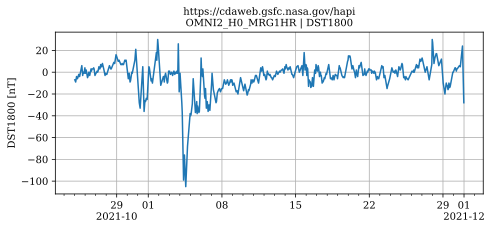

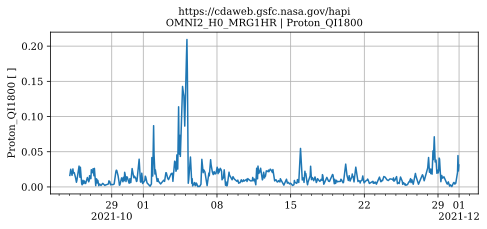

In [8]:
# Plot all parameters in the NumPy ndarray `data`.
from hapiplot import hapiplot
hapiplot(data, meta);

## Extract dates + one data item

Additional details on working with the output of `hapi()` are given in [HAPI_02.ipynb](HAPI_02.ipynb).

The HAPI standard is that all time values [are represented as ISO 8601 ASCII strings](https://github.com/hapi-server/data-specification/blob/master/hapi-dev/HAPI-data-access-spec-dev.md#376-representation-of-time). The function `hapitime2datetime` can be used to convert these strings to Python `datetime` objects.

In [9]:
# Extract time values as datetime objects. See section 3 for more details.
from hapiclient import hapitime2datetime

dateBytes = data['Time']
print("\nFirst 5 values of Time parameter as byte literals = ")
display(dateBytes[0:5])

dateTimes = hapitime2datetime(data['Time'])
print("\nFirst 5 values of Time as datetimes = ")
display(dateTimes[0:5])

# Extract one of the parameters from data, a NumPy ndarray with named fields
BGSEc = data['DST1800']
print("\nDST1800 =")
display(BGSEc[0:5])


First 5 values of Time parameter as byte literals = 


array([b'2021-10-25T00:30:00.000Z', b'2021-10-25T01:30:00.000Z',
       b'2021-10-25T02:30:00.000Z', b'2021-10-25T03:30:00.000Z',
       b'2021-10-25T04:30:00.000Z'], dtype='|S24')


First 5 values of Time as datetimes = 


array([datetime.datetime(2021, 10, 25, 0, 30, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 25, 1, 30, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 25, 2, 30, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 25, 3, 30, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 25, 4, 30, tzinfo=<UTC>)], dtype=object)


DST1800 =


array([-7, -8, -9, -4, -4], dtype=int32)

## Example 2: DSCOVR satellite magnetic field measurement

hapi(): Running hapi.py version 0.2.5
hapi(): file directory = ./hapicache/cdaweb.gsfc.nasa.gov_hapi
hapi(): Reading DSCOVR_H0_MAG_B1F1_20211025T000000_20211201T000000.pkl
hapi(): Reading DSCOVR_H0_MAG_B1F1_20211025T000000_20211201T000000.npy 


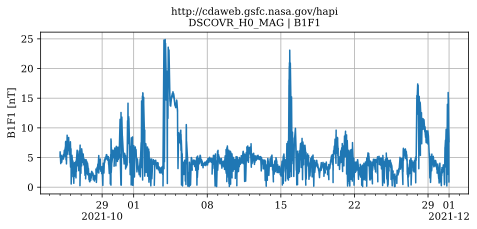

In [10]:
from hapiclient import hapi
from hapiplot import hapiplot

server     = 'http://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'DSCOVR_H0_MAG'
start      = '2021-10-25T00:00:00Z'
stop       = '2021-12-01T00:00:00Z'
parameters = 'B1F1'

opts       = {'logging': True, 'usecache': True, 'cachedir': './hapicache'}

# Get parameters
data, meta = hapi(server, dataset, parameters, start, stop, **opts)

# Plot all parameters in `data`
hapiplot(data, meta);

## Where is DSCOVR?

Often it is useful to know where a given spacecraft is. Coordinates are often available as a HAPI stream.  Here we get the DSCOVR position in GSE coordinates. And, for fun, the Moon's position as well. 

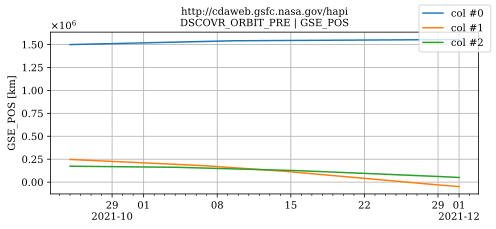

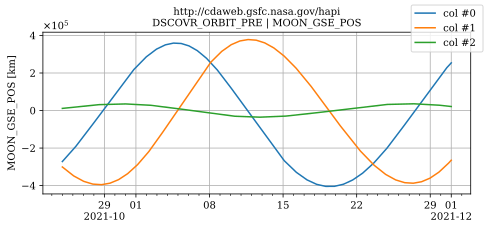

In [12]:
# note we are using the same times etc from previous calls
dataset    = 'DSCOVR_ORBIT_PRE'
parameters = 'GSE_POS,MOON_GSE_POS'

opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache' }

data, meta = hapi(server, dataset, parameters, start, stop, **opts)
hapiplot(data, meta);

### Parameter Order is Important!
To ensure that every HAPI query is identical, parameters MUST be requested in the order that their HAPI server's JSON description specifies.  For example, we queried for "GSE_POS, MOON_GSE_POS". If we switch the query order, we get a HAPI warning to correct that, as shown below. 

In [13]:
#parameters = 'GSE_POS,MOON_GSE_POS'
parameters = 'MOON_GSE_POS,GSE_POS'
opts       = {'logging': True, 'usecache': True, 'cachedir': './hapicache' }
data, meta = hapi(server, dataset, parameters, start, stop, **opts)

hapi(): Running hapi.py version 0.2.5
hapi(): file directory = ./hapicache/cdaweb.gsfc.nasa.gov_hapi
hapi(): Reading ./hapicache/cdaweb.gsfc.nasa.gov_hapi
hapi(): Writing DSCOVR_ORBIT_PRE___.json 
hapi(): Writing DSCOVR_ORBIT_PRE___.pkl 


HAPIError: Order of requested parameters does not match order of parameters in server info metadata.
  Order requested: MOON_GSE_POS,GSE_POS
  Order required: GSE_POS,MOON_GSE_POS


----

# A Note on Syntax

In the examples in this notebook, we typically use the syntax

```Python
server     = 'http://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'DSCOVR_H0_MAG'
start      = '2021-10-25T00:00:00Z'
stop       = '2021-12-05T00:00:00Z'
parameters = 'B1F1'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)
```

Most linters will flag the extra spaces before an `=`; however, for code examples, we find listing the input parameters in the form of a table improves readablility.

An alternative is to use `*` to unpack the regular arguments stored in a list. (We already use the `**` to unpack the keyword arguments stored in `opts`.).

```Python
args = [
            'https://cdaweb.gsfc.nasa.gov/hapi',
            'OMNI2_H0_MRG1HR',
            'DST1800,Proton_QI1800',
            '2021-10-25T00:00:00Z',
            '2021-12-05T00:00:00Z'
        ]
kwargs = {'logging': False}

data, meta = hapi(*args, **kwargs)

# or, store arguments in a dictionary:

args = {
        'server': 'https://cdaweb.gsfc.nasa.gov/hapi',
        'dataset': 'OMNI2_H0_MRG1HR',
        'parameters': 'DST1800,Proton_QI1800',
        'start': '2021-10-25T00:00:00Z',
        'stop': '2021-12-05T00:00:00Z'
}

data, meta = hapi(*list(args.values()), **kwargs)

```

----

## <span style='background-color:yellow'>Problem 01a</span>

The data service [SSCWeb](https://sscweb.gsfc.nasa.gov/) provides ephemeris (position) data for many satellites through a HAPI server: https://hapi-server.org/servers/#server=SSCWeb

1. Plot the position of DISCOVR reported in data from the SSCWeb HAPI server in your notebook by adding code to the following script.
2. Compare the position values in the <code>DSCOVR_H0_MAG</code> dataset from CDAWeb with that from SSCWeb (by using, for example, a plot or console listing).

In [19]:
from hapiclient import hapi
from hapiplot import hapiplot

start      = '2021-10-25T00:00:00Z'
stop       = '2021-12-01T00:00:00Z'
opts       = {'logging': True, 'usecache': True, 'cachedir': './hapicache'}

# Enter code here to obtain and plot position of DISCOVR during the following time given by start an stop.

## <span style='background-color:yellow'>Problem 01b</span>

Earlier in this notebook, the Dst index was obtained from the CDAWeb HAPI server. The [Dst index](https://isgi.unistra.fr/indices_dst.php) is based on magnetic field measurements from four mid-latitude magnetometer instruments. The codes for the instruments are HER, SJG, HON, and KAK. The [INTERMAGNET](https://intermagnet.org/) project provides data from hundreds of magnetometer instruments through a HAPI server: https://hapi-server.org/servers/#server=INTERMAGNET.

Obtain data from one or more of HER, SJG, HON, and KAK over the time range given below and compare it to the Dst index over the same time range. Can you "see" how the Dst index is formed based on the measurements from the individual magnetometers?

In [25]:
start = '2021-10-25T00:00:00Z'
stop  = '2021-12-01T00:00:00Z'

<br>

Next - [HAPI_02.ipynb - Data Structures](HAPI_02.ipynb)